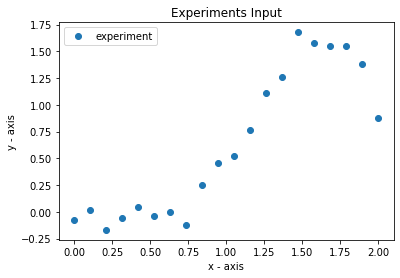

In [ ]:
#  Machine Learning DSIT UOA
#  Assignment 1 - iii - Ridge REgression

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np 

#
th0 = 0.1
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

# play with lamda ridge regression penalty term  here
lamda = 0.2

#data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N

mu, sigma = 0, 0.1 # mean and standard deviation
# noise = np.random.normal(mu,sigma, size=(0, 2))

def y_actual_res(t0, t1, t2, t3, t5, r_step, r__start, r__end):

    # x = np.arange(r__start, r__end, r_step )      #doesn't includes 2 in range [0,2]
    x = np.linspace(r__start, r__end, num= N)     #includes 2 in range [0,2],  N-not a input parameter! - pending!!
    noise = np.random.normal(mu,sigma, size=(20,))  #check dimensionality(!!!!!) - pending
    # noise = 0
    y = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

    return(x, y)

x, y = y_actual_res(th0, th1, th2, th3, th5, step, r_start, r_end)
# plotting the points 
plt.plot(x, y, marker='o',linewidth=0, label = 'experiment' ) 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Experiments Input') 

# function to show the plot 
plt.legend()
plt.show() 


In [ ]:
x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [ ]:
pQ_train = np.zeros(shape = (2,4))
pQ_train[:,0] = 1
pQ_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
pQ_train.T

array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

[[1.         0.         0.         0.         0.         0.        ]
 [1.         0.10526316 0.         0.         0.         0.        ]
 [1.         0.21052632 0.         0.         0.         0.        ]
 [1.         0.31578947 0.         0.         0.         0.        ]
 [1.         0.42105263 0.         0.         0.         0.        ]
 [1.         0.52631579 0.         0.         0.         0.        ]
 [1.         0.63157895 0.         0.         0.         0.        ]
 [1.         0.73684211 0.         0.         0.         0.        ]
 [1.         0.84210526 0.         0.         0.         0.        ]
 [1.         0.94736842 0.         0.         0.         0.        ]
 [1.         1.05263158 0.         0.         0.         0.        ]
 [1.         1.15789474 0.         0.         0.         0.        ]
 [1.         1.26315789 0.         0.         0.         0.        ]
 [1.         1.36842105 0.         0.         0.         0.        ]
 [1.         1.47368421 0.        

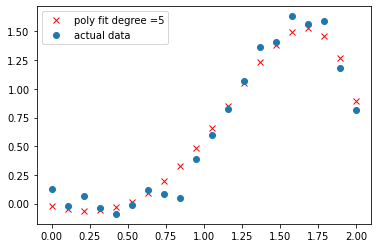

In [ ]:
#ridge regression added, adjust lamda to make it work, if lamda = 0 becomes traditional LS with no regularization
lamda = 0.3  # ridge regression penalty term
poly_deg = 5

Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1
for i in range(1,poly_deg+1):
    if i!=4:         #we want x^4 to be vanished

      Q_train[:,i] = np.power(x,i).reshape((N,))   #x^5+...
      print(Q_train) 

#closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)


plt.plot(x,Q_train.dot(theta), marker='x',linewidth=0, c='r', label='poly fit degree =' + str(poly_deg))

plt.plot(x,y, marker='o',linewidth=0, label='actual data')
plt.legend()
plt.show()

In [ ]:
theta

array([-0.02170006, -0.27665282,  0.27709414,  0.77593919,  0.        ,
       -0.1827265 ])

In [ ]:
Q_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03,
        0.00000000e+00, 1.29235543e-05],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03,
        0.00000000e+00, 4.13553739e-04],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02,
        0.00000000e+00, 3.14042371e-03],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02,
        0.00000000e+00, 1.32337197e-02],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01,
        0.00000000e+00, 4.03861073e-02],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01,
        0.00000000e+00, 1.00493559e-01],
       [1.00000000e+00, 7.36842105e-01, 5.42936288e-01, 4.00058318e-01,
        0.00000000e+00, 2.17206178e-01],
       [1.00000000e+00, 8.42105263e-01, 7.09141274e-01, 5.97171599e-01,
        0.00000000e+00, 

In [ ]:
app = [1,2,3,4]
bpp = [10] + app
bpp

[10, 1, 2, 3, 4]

In [ ]:
D_train = np.zeros(shape = (N,poly_deg+1))
D_train[:,0] = 1
D_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])